In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from datetime import datetime

# yahoo Finance API library (useful?)
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM

from pandas_datareader import data as pdr
yf.pdr_override()

In [2]:
stock = 'TSLA'

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

In [3]:
globals()[stock] = yf.download(stock, start, end)
df_tsla = globals()[stock]

[*********************100%%**********************]  1 of 1 completed


## Data Cleaning

In [4]:
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,234.600006,235.333328,226.833328,228.300003,228.300003,81129300
2021-05-04,226.313339,227.816666,219.233337,224.533340,224.533340,89217900
2021-05-05,227.020004,228.433334,222.446671,223.646667,223.646667,65705700
2021-05-06,226.919998,227.006668,216.666672,221.179993,221.179993,83353800
2021-05-07,221.933334,230.000000,220.073334,224.123337,224.123337,70407600


In [5]:
df_tsla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-26,168.850006,172.119995,166.369995,168.289993,168.289993,109815700
2024-04-29,188.419998,198.869995,184.539993,194.050003,194.050003,243869700
2024-04-30,186.979996,190.949997,182.839996,183.279999,183.279999,127031800
2024-05-01,182.000000,185.860001,179.009995,179.990005,179.990005,92829700
2024-05-02,182.860001,184.600006,176.020004,180.009995,180.009995,88285130


In [6]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2021-05-03 to 2024-05-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       756 non-null    float64
 1   High       756 non-null    float64
 2   Low        756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [7]:
df_tsla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Analysis

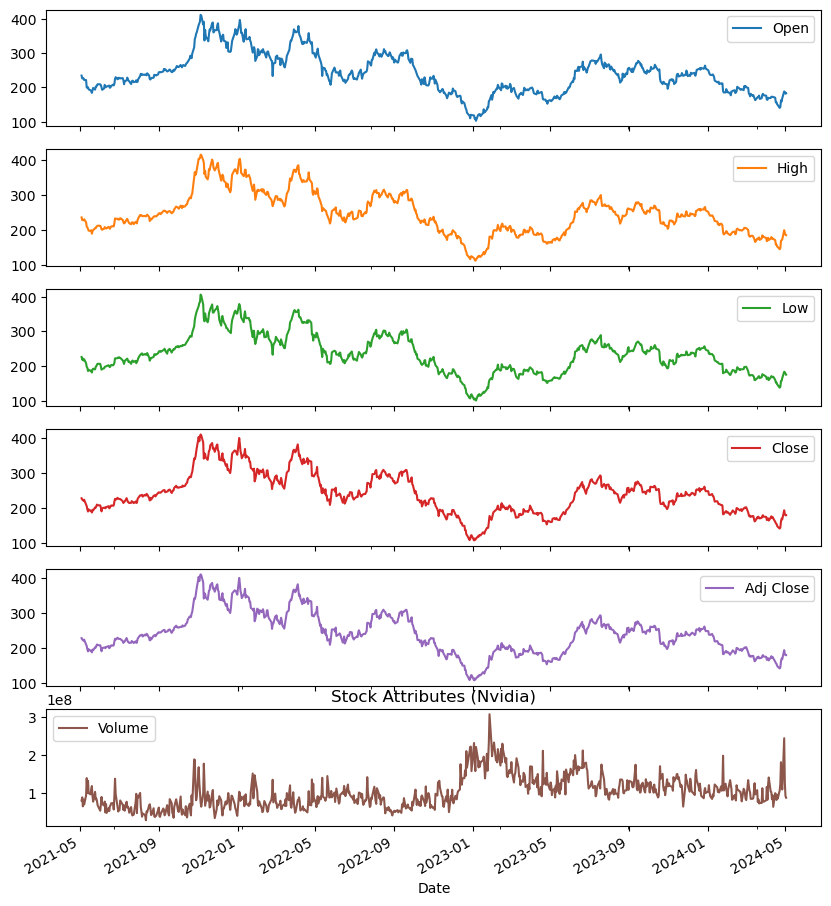

In [8]:
df_tsla.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

In [9]:
fig = px.line(df_tsla, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

In [10]:
fig = px.line(df_tsla, y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

In [11]:
# Nvidia Candlestick Chart

fig = go.Figure(data=[go.Candlestick(x=df_tsla.index, open=df_tsla['Open'], high=df_tsla['High'], low=df_tsla['Low'], close=df_tsla['Close'])])

fig.update_layout(title='Nvidia Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()